In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

jnj = pd.read_csv("TAQ_JNJ_1004_1015_2010_trading_.csv", index_col=False, delim_whitespace=True)
cat = pd.read_csv("TAQ_CAT_FEB_2010_trading_.csv", index_col=False, delim_whitespace=True)


In [2]:
jnj['time'] = jnj["date"].map(str) + ' '+ jnj["hour"].map(str)
jnj['time'] = jnj["time"].map(str) + ':'+ jnj["minute"].map(str)
jnj['time'] = jnj['time'].map(str) + ':'+ jnj["second"].map(str)

jnj['dateTime'] = pd.to_datetime(jnj['time'], format='%Y%m%d %H:%M:%S')
print('JNJ dataset after handeling date and time:')
display(jnj.head(5))


JNJ dataset after handeling date and time:


,date,hour,minute,second,price,volume,time,dateTime
0,20101004,6,25,15,61.75,100,20101004 6:25:15,2010-10-04 06:25:15
1,20101004,8,33,19,61.56,100,20101004 8:33:19,2010-10-04 08:33:19
2,20101004,8,41,9,61.56,100,20101004 8:41:9,2010-10-04 08:41:09
3,20101004,8,48,50,61.60,100,20101004 8:48:50,2010-10-04 08:48:50
4,20101004,8,48,55,61.60,100,20101004 8:48:55,2010-10-04 08:48:55


In [3]:
cat['time'] = cat["DATE"].map(str) + ' '+ cat["Hour"].map(str)
cat['time'] = cat["time"].map(str) + ':'+ cat["Min"].map(str)
cat['time'] = cat['time'].map(str) + ':'+ cat["Sec"].map(str)

cat['dateTime'] = pd.to_datetime(cat['time'], format='%Y%m%d %H:%M:%S')
print('CAT dataset after handeling date and time:')
display(cat.head(5))

CAT dataset after handeling date and time:


,DATE,Hour,Min,Sec,PRICE,SIZE,time,dateTime
0,20100201,8,11,42,52.52,100,20100201 8:11:42,2010-02-01 08:11:42
1,20100201,8,11,42,52.52,200,20100201 8:11:42,2010-02-01 08:11:42
2,20100201,8,11,43,52.50,200,20100201 8:11:43,2010-02-01 08:11:43
3,20100201,8,38,50,52.24,3149,20100201 8:38:50,2010-02-01 08:38:50
4,20100201,8,39,3,52.65,100,20100201 8:39:3,2010-02-01 08:39:03


In [4]:
def normalTrading(dataset):
    mid = dataset.loc[9<dataset['hour']]
    mid = mid.loc[mid['hour']<16]

    dataset9 = dataset.loc[9==dataset['hour']]
    dataset9 = dataset9.loc[dataset9['minute']>=30]

    dataset16 = dataset.loc[dataset['hour']==16]
    dataset16 = dataset16.loc[dataset16['minute']==0]
    dataset16 = dataset16.loc[dataset16['second']==0]

    dataset_norm = dataset9.append(mid, ignore_index=True)
    dataset_norm = dataset_norm.append(dataset16, ignore_index=True)
    
    return dataset_norm

print('JNJ dataset after handeling normal trading window:')
jnj_norm = normalTrading(jnj)
jnj_norm.to_csv('TAQ_JNJ_1004_1015_2010_trading_normal_hours.csv', index=False)
display(jnj_norm.head())


JNJ dataset after handeling normal trading window:


,date,hour,minute,second,price,volume,time,dateTime
0,20101004,9,30,0,61.54,281,20101004 9:30:0,2010-10-04 09:30:00
1,20101004,9,30,0,61.54,281,20101004 9:30:0,2010-10-04 09:30:00
2,20101004,9,30,1,61.62,100,20101004 9:30:1,2010-10-04 09:30:01
3,20101004,9,30,1,61.62,100,20101004 9:30:1,2010-10-04 09:30:01
4,20101004,9,30,3,61.53,100,20101004 9:30:3,2010-10-04 09:30:03


In [5]:
def CATnormalTrading(dataset):
    mid = dataset.loc[9<dataset['Hour']]
    mid = mid.loc[mid['Hour']<16]

    dataset9 = dataset.loc[9==dataset['Hour']]
    dataset9 = dataset9.loc[dataset9['Min']>=30]

    dataset16 = dataset.loc[dataset['Hour']==16]
    dataset16 = dataset16.loc[dataset16['Min']==0]
    dataset16 = dataset16.loc[dataset16['Sec']==0]

    dataset_norm = dataset9.append(mid, ignore_index=True)
    dataset_norm = dataset_norm.append(dataset16, ignore_index=True)
    
    return dataset_norm

print('CAT dataset after handeling normal trading window:')
cat_norm = CATnormalTrading(cat)
cat_norm.to_csv('TAQ_CAT_Feb_2010_trading_normal_hours.csv', index=False)
display(cat_norm.head())



CAT dataset after handeling normal trading window:


,DATE,Hour,Min,Sec,PRICE,SIZE,time,dateTime
0,20100201,9,30,0,52.82,4528,20100201 9:30:0,2010-02-01 09:30:00
1,20100201,9,30,0,52.82,4528,20100201 9:30:0,2010-02-01 09:30:00
2,20100201,9,30,4,52.85,5,20100201 9:30:4,2010-02-01 09:30:04
3,20100201,9,30,8,52.83,83300,20100201 9:30:8,2010-02-01 09:30:08
4,20100201,9,30,8,52.86,200,20100201 9:30:8,2010-02-01 09:30:08


In [6]:
def First5000transactions(dataset, price, vol):

    f5000 = dataset.iloc[:5000,:]
    print('***First 5000 transactions***')
    f5000.plot(x='time', y=price)
    f5000.plot(x='time', y=vol)

def Last5000transactions(dataset, price, vol):
    nl5000 = dataset.shape[0]-5000
    l5000 = dataset.iloc[nl5000:,:]
    print('\n***Last 5000 transactions***')
    l5000.plot(x='time', y=price)
    l5000.plot(x='time', y=vol)
    

Visualize the first 5000 transactions from JNJ dataset:
***First 5000 transactions***


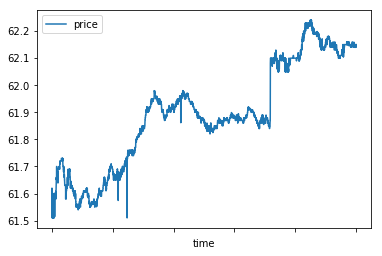

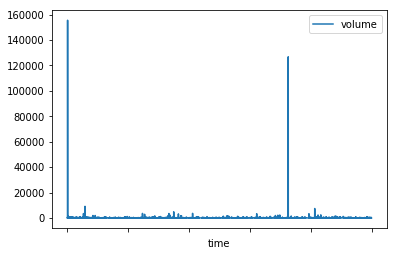

In [7]:
print('Visualize the first 5000 transactions from JNJ dataset:')
First5000transactions(jnj_norm, 'price', 'volume')


Visualize the last 5000 transactions from JNJ dataset:

***Last 5000 transactions***


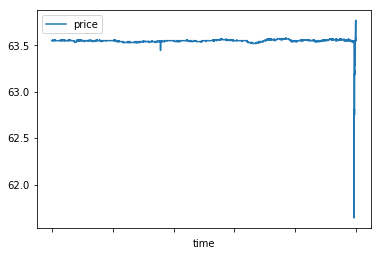

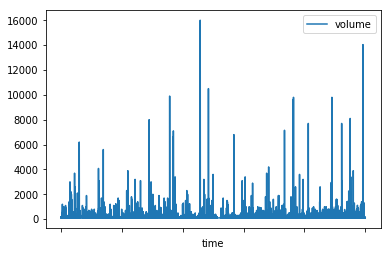

In [8]:
print('Visualize the last 5000 transactions from JNJ dataset:')
Last5000transactions(jnj_norm, 'price', 'volume')

Visualize the first 5000 transactions from CAT dataset:
***First 5000 transactions***


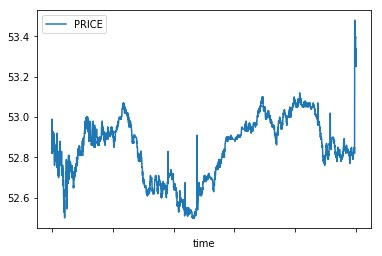

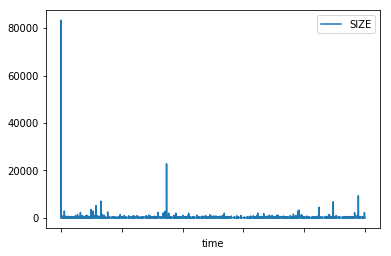

In [9]:
print('Visualize the first 5000 transactions from CAT dataset:')
First5000transactions(cat_norm, 'PRICE', 'SIZE')


Visualize the last 5000 transactions from CAT dataset:

***Last 5000 transactions***


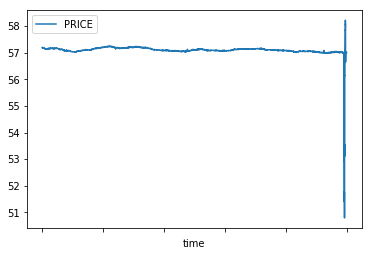

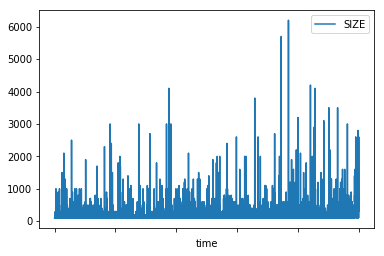

In [10]:
print('Visualize the last 5000 transactions from CAT dataset:')
Last5000transactions(cat_norm, 'PRICE', 'SIZE')

Visualize price change of JNJ dataset:
There are total 114805 transitions with price change


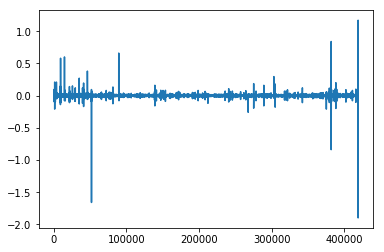

In [11]:
def plot_price_change(dataset, price):

    price_change_lst = []
    count = 0
    for i in range(1, dataset.shape[0]):
        diff = dataset[price][i] - dataset[price][i-1]
        price_change_lst.append(diff)
        if diff != 0:
            count += 1
    print('There are total '+str(count)+ ' transitions with price change')
    
    plt.plot(price_change_lst)
    plt.show()
    
print('Visualize price change of JNJ dataset:')
plot_price_change(jnj_norm, 'price')

Visualize price change of CAT dataset:
There are total 318033 transitions with price change


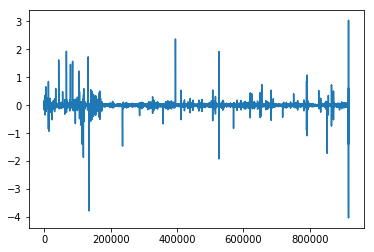

In [12]:
print('Visualize price change of CAT dataset:')
plot_price_change(cat_norm, 'PRICE')

In [13]:
def time_itervals(df, file, price, normal):
    interval = ['5min', '10min', '30min', '60min']
    intervals = ['5', '10', '30', '60']

    for n in range(len(interval)):
        intv = 'data_'+str(interval[n])
        intv = df.groupby(pd.Grouper(key='dateTime',\
                                        freq=interval[n])).aggregate(np.mean)
        
        dataset = normal(intv)
        S_i = dataset[price]
        S_i_minus_1 = dataset[price].shift(1)
        dataset["U_sequence"]=np.log(S_i/S_i_minus_1)
        filename = file+intervals[n]+'_min_trading_unit.csv'
        dataset.to_csv(filename)
        print('\nPerformance on '+filename)
        print('The dimension of the dataset:', dataset.shape)
        num = dataset.shape[0]

        s = np.sqrt(np.sum(dataset['U_sequence']**2)/(num-1)-\
                      np.sum(dataset['U_sequence']**2)/(num*(num-1)))

        print('Section volatility:', s)

        r_volatility = np.sum(dataset['U_sequence']**2)
        print('Realized volatility:', r_volatility)

        skewness = num*(np.sum((dataset['U_sequence']-\
                                np.mean(dataset['U_sequence']))\
                               **3))/((num-1)*(num-2)* (s**3))
        print('Skewness:', skewness)
        kurtosis = np.sum((dataset['U_sequence']-\
                           np.mean(dataset['U_sequence']))**4)/(num*(s**4))-3
        print('Kurtosis:', kurtosis)



In [14]:
print('***Visualize price change of JNJ dataset***')
time_itervals(jnj_norm, 'TAQ_JNJ_1004_1015_2010_', 'price', normalTrading)

***Visualize price change of JNJ dataset***

Performance on TAQ_JNJ_1004_1015_2010_5_min_trading_unit.csv
The dimension of the dataset: (790, 7)
Section volatility: 0.0019110944961042158
Realized volatility: 0.0028853029167014627
Skewness: -7.492637535311781
Kurtosis: 156.2926470013325

Performance on TAQ_JNJ_1004_1015_2010_10_min_trading_unit.csv
The dimension of the dataset: (400, 7)
Section volatility: 0.0026964691200160717
Realized volatility: 0.002908378286080099
Skewness: -5.421905240736304
Kurtosis: 78.3679877666303

Performance on TAQ_JNJ_1004_1015_2010_30_min_trading_unit.csv
The dimension of the dataset: (140, 7)
Section volatility: 0.004591465452183642
Realized volatility: 0.002951417699803431
Skewness: -3.7370655826861454
Kurtosis: 29.12263112031411

Performance on TAQ_JNJ_1004_1015_2010_60_min_trading_unit.csv
The dimension of the dataset: (80, 7)
Section volatility: 0.006083036148529551
Realized volatility: 0.002960266302745379
Skewness: -2.886324447521437
Kurtosis: 15.70

In [15]:
print('***Visualize price change of CAT dataset***')
time_itervals(cat_norm, 'TAQ_CAT_FEB_2010_', 'PRICE', CATnormalTrading)

***Visualize price change of CAT dataset***

Performance on TAQ_CAT_FEB_2010_5_min_trading_unit.csv
The dimension of the dataset: (1501, 7)
Section volatility: 0.004925446132118746
Realized volatility: 0.03641428942020567
Skewness: -2.556111605058597
Kurtosis: 98.63871752527625

Performance on TAQ_CAT_FEB_2010_10_min_trading_unit.csv
The dimension of the dataset: (760, 7)
Section volatility: 0.006906539577983847
Realized volatility: 0.03625221959611555
Skewness: -1.7973189879337408
Kurtosis: 50.24308425055118

Performance on TAQ_CAT_FEB_2010_30_min_trading_unit.csv
The dimension of the dataset: (266, 7)
Section volatility: 0.011552580330438348
Realized volatility: 0.03550092186946745
Skewness: -0.8656067080200323
Kurtosis: 15.590162267884441

Performance on TAQ_CAT_FEB_2010_60_min_trading_unit.csv
The dimension of the dataset: (152, 7)
Section volatility: 0.015138476760707845
Realized volatility: 0.03483436875244271
Skewness: -0.6488532825486875
Kurtosis: 7.694939871135599
